## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

## Data

In [2]:
df = pd.read_csv('adult.data', header=None)

# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

In [3]:
df

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   educ-num        32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.nunique(axis=0)

age                  73
workclass             9
fnlwgt            21648
education            16
educ-num             16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [6]:
for i in df.columns:
    if df[i].dtype == 'object':
        print (f'\033[4m{i}\033[0m:')
        print (df[i].unique())

workclass:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex:
[' Male' ' Female']
native-country:
[' United-States' ' Cuba' ' Jamaica' ' 

#### Encoding

In [7]:
l_enc = LabelEncoder()

In [8]:
df_enc = df

binary features

In [9]:
df_enc['sex'] = l_enc.fit_transform(df_enc['sex']).astype(np.uint8)

In [10]:
df_enc['salary'] = l_enc.fit_transform(df_enc['salary']).astype(np.uint8)

In [11]:
df_enc['workclass'] = df_enc['workclass'].replace({' State-gov':'gov', ' Federal-gov':'gov', ' Local-gov':'gov'})

In [12]:
df_enc['workclass'] = df_enc['workclass'].replace({' Self-emp-not-inc':'self', ' Self-emp-inc':'self'})

In [13]:
df_enc['workclass'] = df_enc['workclass'].replace(' ?','private')

In [14]:
df_enc['workclass'] = df_enc['workclass'].replace(' Private', 'private')

In [15]:
df_enc['workclass'] = df_enc['workclass'].replace({' Without-pay' : 'other', ' Never-worked' : 'other' })

In [16]:
df_enc['workclass'].unique()

array(['gov', 'self', 'private', 'other'], dtype=object)

In [17]:
ohe = pd.get_dummies(df_enc['workclass'])

In [18]:
df_enc = pd.concat([df_enc, ohe], axis=1).drop(columns='workclass')

In [19]:
df_enc['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [20]:
df_enc['marital-status'] = df_enc['marital-status'].replace({' Married-civ-spouse':'married',' Married-spouse-absent':'married',' Married-AF-spouse':'married'})

In [21]:
df_enc['marital-status'] = df_enc['marital-status'].apply(lambda x: 0 if x == 'married' else 1)

native-country too complex faster to drop

In [22]:
df_enc['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [23]:
ohe = pd.get_dummies(df_enc['native-country'])

In [24]:
df_enc = pd.concat([df_enc, ohe], axis=1).drop(columns='native-country')

In [25]:
ohe = pd.get_dummies(df_enc['race'])

In [26]:
df_enc = pd.concat([df_enc, ohe], axis=1).drop(columns='race')

In [27]:
df_enc = df_enc.drop(columns='relationship')

In [28]:
ohe = pd.get_dummies(df_enc['education'])

In [29]:
df_enc = pd.concat([df_enc, ohe], axis=1).drop(columns='education')

In [30]:
df_enc['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [31]:
df_enc['occupation'] = df_enc['occupation'].replace(' ?', ' Unknown')

In [32]:
ohe = pd.get_dummies(df_enc['occupation'])

In [33]:
df_enc = pd.concat([df_enc, ohe], axis=1).drop(columns='occupation')

In [34]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 91 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          32561 non-null  int64
 1   fnlwgt                       32561 non-null  int64
 2   educ-num                     32561 non-null  int64
 3   marital-status               32561 non-null  int64
 4   sex                          32561 non-null  uint8
 5   capital-gain                 32561 non-null  int64
 6   capital-loss                 32561 non-null  int64
 7   hours-per-week               32561 non-null  int64
 8   salary                       32561 non-null  uint8
 9   gov                          32561 non-null  uint8
 10  other                        32561 non-null  uint8
 11  private                      32561 non-null  uint8
 12  self                         32561 non-null  uint8
 13   ?                           32561 non-null  u

#### Relationship

Pairplot

Boxplot

Corr heatmap

In [35]:
corr = df_enc.corr()

<AxesSubplot: >

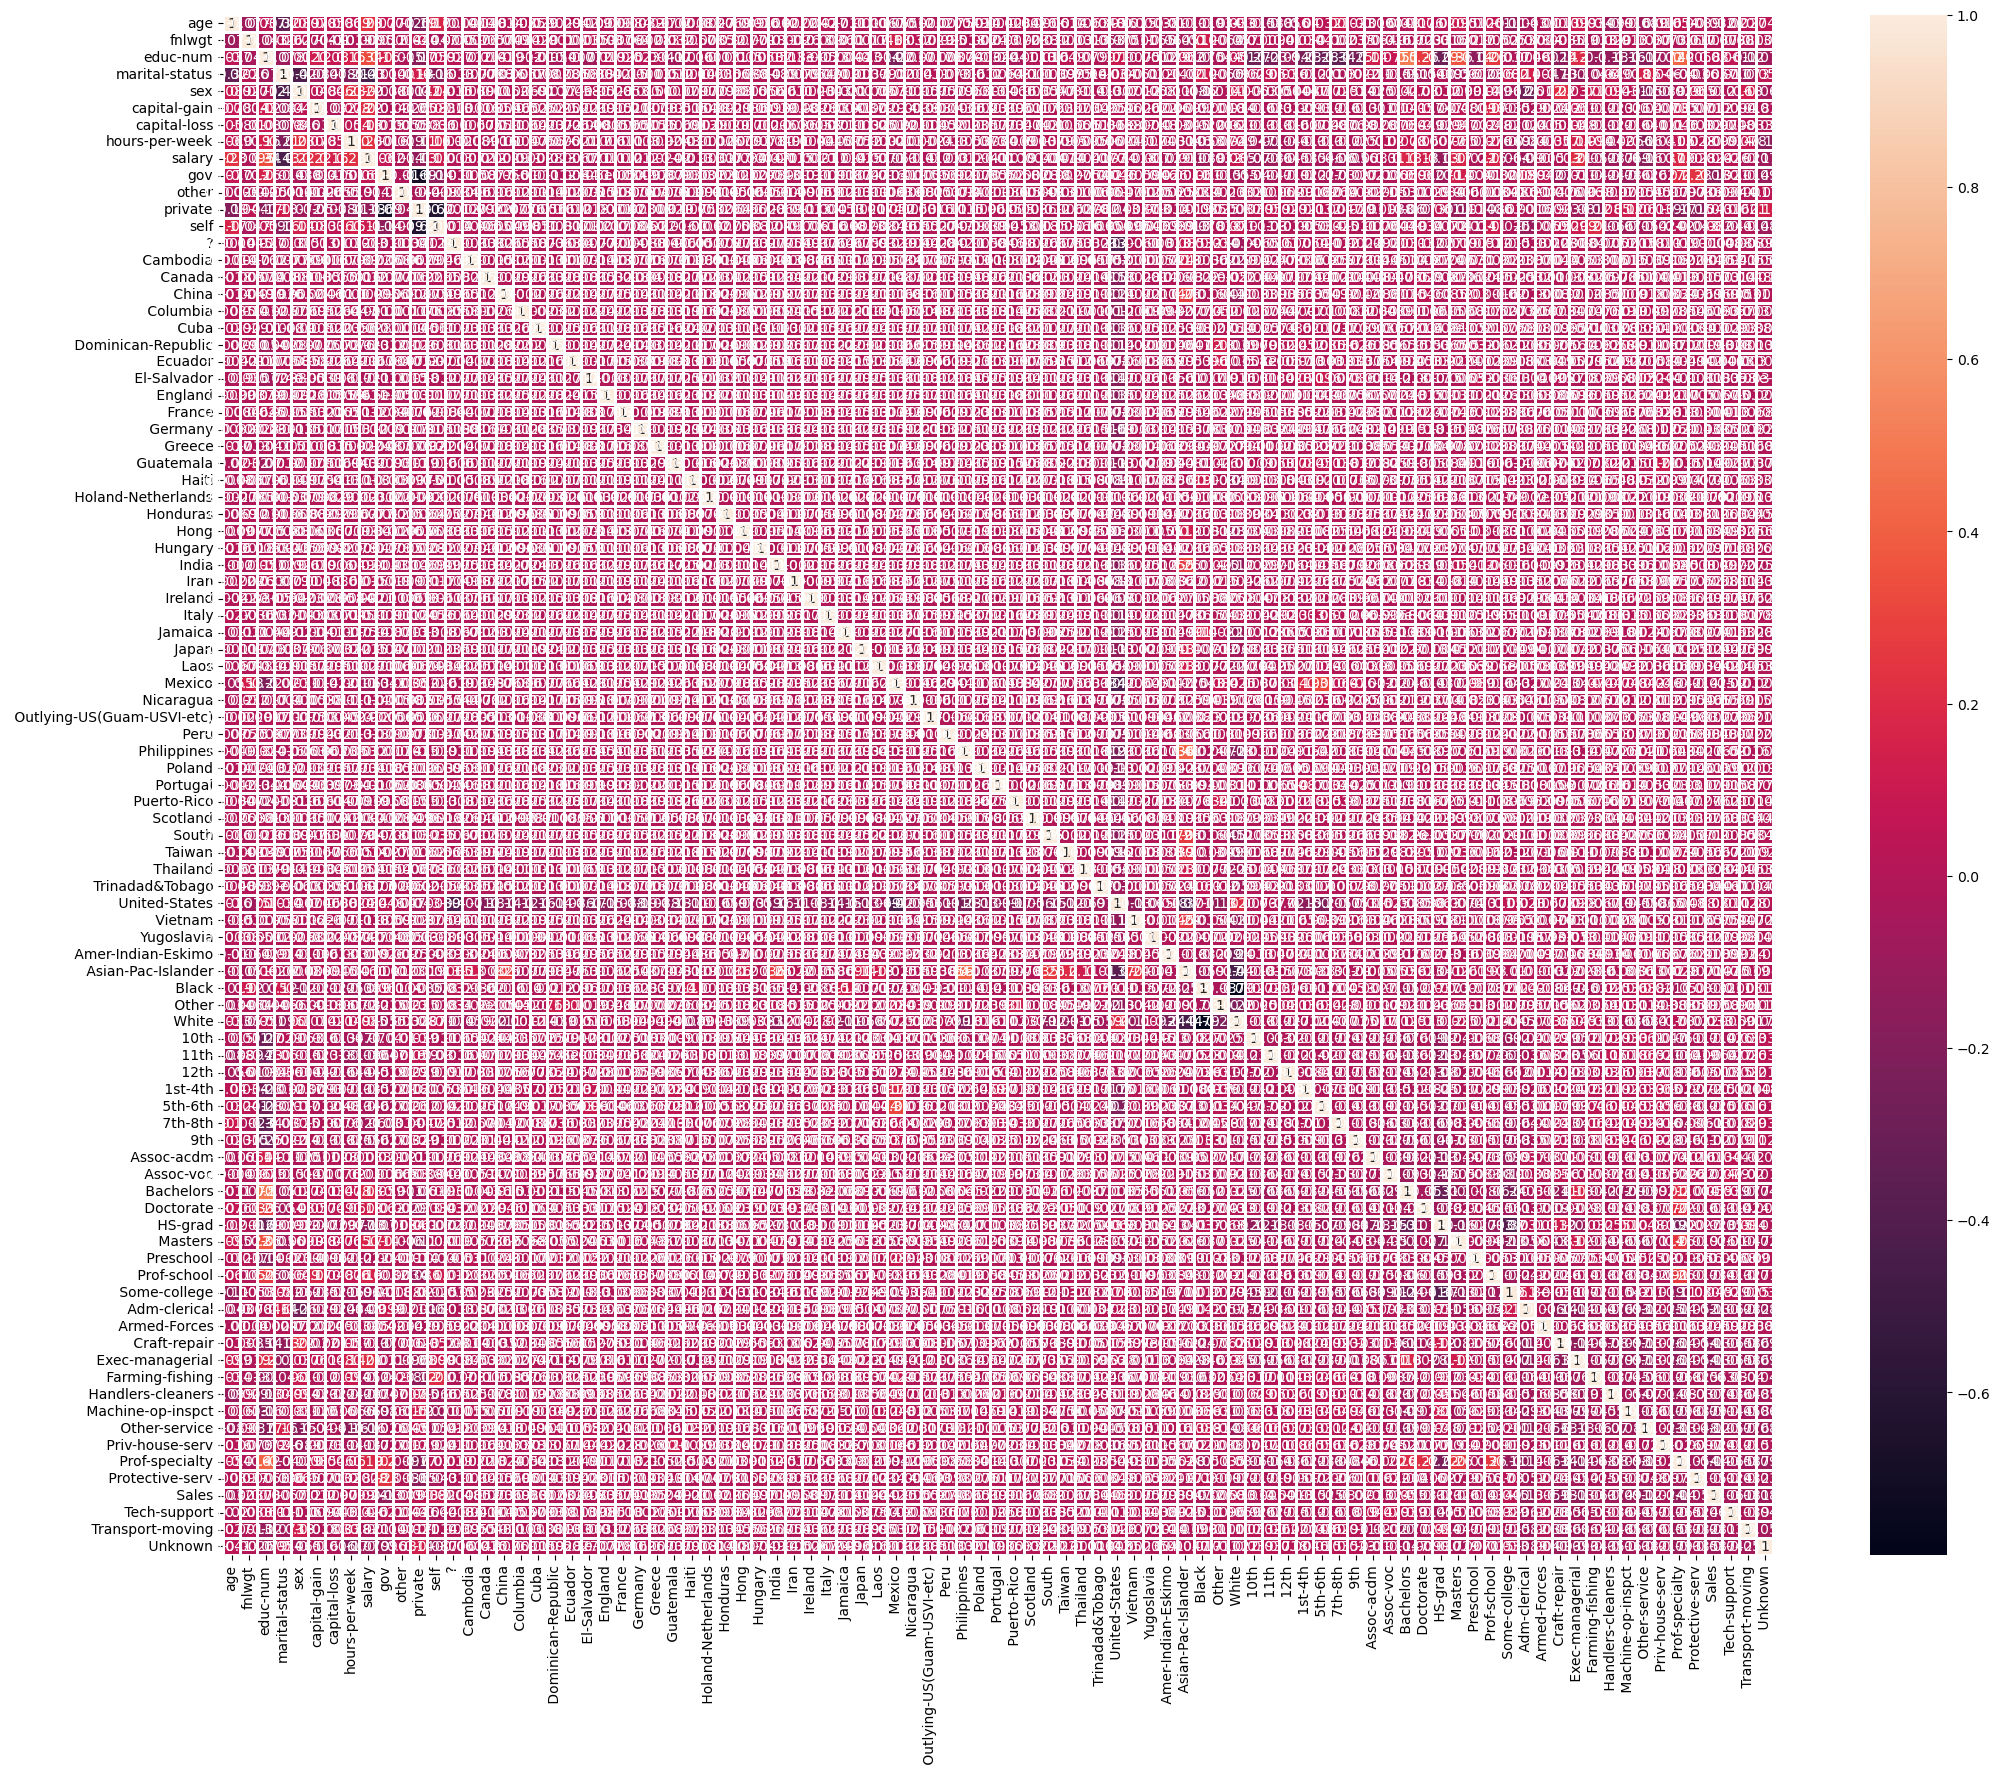

In [36]:
plt.figure(figsize=(25,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=1)

## Model

#### Train test split

In [37]:
df_corr = df_enc

In [38]:
X = df_corr.drop(columns=['salary'])
y = df_corr['salary']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

#### Logistic Regression

In [39]:
log_reg = LogisticRegression()

In [40]:
log_reg.fit(X_train, y_train)
preds_valid = log_reg.predict(X_valid)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.7913403961308153
Precision=0.6793650793650794
Recall=0.27003154574132493


StandardScaler

In [41]:
std_scaler = StandardScaler().fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_valid_std = std_scaler.transform(X_valid)

In [42]:
log_reg.fit(X_train_std, y_train)
preds_valid = log_reg.predict(X_valid_std)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.8493781667434362
Precision=0.7377952755905511
Recall=0.591167192429022


PCA

In [43]:
for i in [2, 5, 10, 20, 30, 40]:
    pca = PCA(i).fit(X_train_std)
    X_train_pca = pca.transform(X_train_std)
    X_valid_pca = pca.transform(X_valid_std)
    log_reg.fit(X_train_pca, y_train)
    preds_valid = log_reg.predict(X_valid_pca)

    # Тестирование
    print('PCA =',i)
    print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
    print(f'Precision={precision_score(y_valid, preds_valid)}')
    print(f'Recall={recall_score(y_valid, preds_valid)}')

PCA = 2
Accuracy=0.7887302318440043
Precision=0.6199770378874856
Recall=0.34069400630914826
PCA = 5
Accuracy=0.8096115461384923
Precision=0.6692836113837095
Recall=0.4302839116719243
PCA = 10
Accuracy=0.8212805158912944
Precision=0.6922374429223744
Recall=0.4782334384858044
PCA = 20
Accuracy=0.8257331490864425
Precision=0.7016129032258065
Recall=0.494006309148265
PCA = 30
Accuracy=0.826654383540611
Precision=0.7024866785079928
Recall=0.49905362776025236
PCA = 40
Accuracy=0.8298787041302012
Precision=0.7075718015665796
Recall=0.5129337539432177


In [44]:
log_regCV = LogisticRegressionCV()

In [45]:
log_regCV.fit(X_train_std, y_train)
preds_valid = log_regCV.predict(X_valid_std)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.849531705819131
Precision=0.7380015735641228
Recall=0.5917981072555205


#### KNN Classifier

In [46]:
knn_cl = KNeighborsClassifier()

In [47]:
knn_cl.fit(X_train_std, y_train)
preds_valid = knn_cl.predict(X_valid_std)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.8200522032857362
Precision=0.6589684372594303
Recall=0.5400630914826499


#### GridSearchCV

In [48]:
parameters = {'n_neighbors' : (3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25), 'weights' : ('uniform','distance')}
model = KNeighborsClassifier(n_jobs=-1)
gsCV = GridSearchCV(model, param_grid=parameters, scoring='recall')
gsCV.fit(X_train_std, y_train)
gsCV.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [49]:
preds_valid = gsCV.predict(X_valid_std)

# Тестирование
print(f'Accuracy={accuracy_score(y_valid, preds_valid)}')
print(f'Precision={precision_score(y_valid, preds_valid)}')
print(f'Recall={recall_score(y_valid, preds_valid)}')

Accuracy=0.810379241516966
Precision=0.6232394366197183
Recall=0.5583596214511041


#### Classification Report

In [50]:
print(classification_report(y_valid, preds_valid))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4928
           1       0.62      0.56      0.59      1585

    accuracy                           0.81      6513
   macro avg       0.74      0.72      0.73      6513
weighted avg       0.80      0.81      0.81      6513



#### Confussion Matrix

In [51]:
confusion_matrix(y_valid, preds_valid)

array([[4393,  535],
       [ 700,  885]], dtype=int64)